In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [ ]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q

from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

In [ ]:

%matplotlib inline
from IPython.core.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Verdana">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Roboto", Verdana, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Verdana", sans-serif;
            }
        </style>
    </head>
</html>
"""

HTML(html_contents)

In [ ]:

oil_data = pd.read_csv('oil.csv')
train = pd.read_csv('train.csv', parse_dates = True, low_memory = False, index_col = 'date')
test = pd.read_csv('test.csv')
submission_sample = pd.read_csv('sample_submission.csv')
holidays_data = pd.read_csv('holidays_events.csv')
store_data =  pd.read_csv('stores.csv')
transaction_data = pd.read_csv('transactions.csv')


# time series as indexes
train.index

Index(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
       '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
       ...
       '2015-02-08', '2015-02-08', '2015-02-08', '2015-02-08', '2015-02-08',
       '2015-02-08', '2015-02-08', '2015-02-08', '2015-02-08', '2'],
      dtype='object', name='date', length=1366721)

In [ ]:
print('Number of train samples: ', train.shape)
print('Number of test samples: ', test.shape)
print('Number of store data: ', store_data.shape)
print('Number of Holiday data: ', holidays_data.shape)
print('Number of Oil Price data: ', oil_data.shape)
print('Number of features: ', len(train.columns))
print(train.info())
print(train.columns)
print(train.head())

Number of train samples:  (1366721, 5)
Number of test samples:  (28512, 5)
Number of store data:  (54, 5)
Number of Holiday data:  (350, 6)
Number of Oil Price data:  (1218, 2)
Number of features:  5
<class 'pandas.core.frame.DataFrame'>
Index: 1366721 entries, 2013-01-01 to 2
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1366721 non-null  int64  
 1   store_nbr    1366720 non-null  float64
 2   family       1366720 non-null  object 
 3   sales        1366720 non-null  float64
 4   onpromotion  1366720 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 62.6+ MB
None
Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
            id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0        1.0  AUTOMOTIVE    0.0          0.0
2013-01-01   1        1.0   BABY CARE    0.0          0.0
2013-

In [ ]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1366721 entries, 2013-01-01 to 2
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1366721 non-null  int64  
 1   store_nbr    1366720 non-null  float64
 2   family       1366720 non-null  object 
 3   sales        1366720 non-null  float64
 4   onpromotion  1366720 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 62.6+ MB


id             0
store_nbr      1
family         1
sales          1
onpromotion    1
dtype: int64

In [ ]:
import pandas as pd

# Sample data
data = {
    'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'value': [10, 20, 30]
}
train = pd.DataFrame(data)

# Convert date column to datetime
train['date'] = pd.to_datetime(train['date'])

# Set the date column as the index
train.set_index('date', inplace=True)

# Extract year, month, day, and week of the year
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week

print(train)


            value  Year  Month  Day  WeekOfYear
date                                           
2023-01-01     10  2023      1    1          52
2023-01-02     20  2023      1    2           1
2023-01-03     30  2023      1    3           1


In [ ]:
train_store=train.merge(store_data, on = 'store_nbr', how='left')
train_store.head()

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13.0
1,1,1.0,BABY CARE,0.0,0.0,Quito,Pichincha,D,13.0
2,2,1.0,BEAUTY,0.0,0.0,Quito,Pichincha,D,13.0
3,3,1.0,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13.0
4,4,1.0,BOOKS,0.0,0.0,Quito,Pichincha,D,13.0


In [ ]:
ts_unique = train_store.nunique()
for index, value in ts_unique.items():
    print(f"Index : {index}, Value : {value}")
    if value < 50:
        print('*'*50)
        print('keys')
        print('*'*50)
        print(train_store[index].unique())
    else:
        print('*'*50)
        print('skipping', index)
        print('More than 50 unique elements')
        print('*'*50)

Index : id, Value : 1366721
**************************************************
skipping id
More than 50 unique elements
**************************************************
Index : store_nbr, Value : 54
**************************************************
skipping store_nbr
More than 50 unique elements
**************************************************
Index : family, Value : 33
**************************************************
keys
**************************************************
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD' nan]
Index : sales, Value : 171591
*******************

In [ ]:
import matplotlib.pyplot as plt
import random
def random_color():
    return "#{}{}{}{}{}{}".format(*(random.choice("0123456789abcdef") for _ in range(6)))

# data
ts_sales_type = train_store.groupby('type').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
ts_sales_family = train_store.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:20]
ts_sales_cluster = train_store.groupby('cluster').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
ts_sales_state = train_store.groupby('state').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
ts_sales_city = train_store.groupby('city').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)


ts_sales_type['color'] = [random_color() for _ in range(len(ts_sales_type))]
#ts_sales_type['color'][3:] = [random_color() for _ in range(len(ts_sales_type[3:]))]
ts_sales_family['color'] = [random_color() for _ in range(len(ts_sales_family))]
ts_sales_cluster['color'] = [random_color() for _ in range(len(ts_sales_cluster))]
ts_sales_state['color'] = [random_color() for _ in range(len(ts_sales_state))]
ts_sales_city['color'] = [random_color() for _ in range(len(ts_sales_city))]

fig = make_subplots(rows=5, cols=2,
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None],
                           [{"type": "pie"},{"type": "bar"} ],
                           [{"colspan": 2}, None],
                           [{"colspan": 2}, None]],
                    column_widths=[0.5, 0.5], vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=("Average Product Sales",
                                    "Highest Average Sales in Store Types",
                                    "\n",
                                    "\n"
                                    "Average Sales per State",
                                    "Average Sales per Cluster",
                                    "\n",
                                    "\n"
                                    "Average Sales per City",
                                   ))
fig.add_trace(go.Bar(x=ts_sales_family['sales'],
                     y=ts_sales_family['family'],
                     marker=dict(color= ts_sales_family['color']),
                     name='Family', orientation='h'),
                     row=1, col=1)
fig.add_trace(go.Pie(values=ts_sales_type['sales'], labels=ts_sales_type['type'], name='Store Type',
                     marker=dict(colors= ts_sales_family['color']), hole=0.4+(0.1 * random.randrange(-2, 2)),
                     hoverinfo='label+percent+value', textinfo='label'),row=1, col=2)
fig.add_trace(go.Bar(x=ts_sales_cluster['sales'],
                     y=ts_sales_cluster['cluster'],
                     marker=dict(color= ts_sales_cluster['color']),
                     name='Cluster', orientation='h'),
                     row=3, col=2)
fig.add_trace(go.Pie(values=ts_sales_state['sales'], labels=ts_sales_state['state'], name='State',
                     marker=dict(colors= ts_sales_state['color']), hole=0.4+(0.1 * random.randrange(-2, 2)),
                     hoverinfo='label+percent+value', textinfo='label'),row=3, col=1)
fig.add_trace(go.Bar(x=ts_sales_city['city'], y=ts_sales_city['sales'],
                     marker=dict(color= ts_sales_city['color']), name='City'),
                     row=5, col=1)
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=3, col=2)
fig.update_xaxes(tickmode = 'array', tickvals=ts_sales_cluster.cluster, ticktext=[i for i in range(1,17)], row=3, col=2)
fig.update_yaxes(visible=False, row=5, col=1)
plt_themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
fig.update_layout(height=1800, bargap=0.3,
                  margin=dict(b=10,r=20,l=20),
                  xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  title_x=0.5,
                  template=plt_themes[random.randrange(0, 6)],
                  title_font=dict(size=25, color=random_color(), family="Roboto, sans-serif"),
                  font=dict(color=random_color()),
                  hoverlabel=dict(bgcolor=random_color(), font_size=15, font_family="Roboto, sans-serif"),
                  showlegend=False)
fig.show()

Text(0.5, 0, 'Promotions')

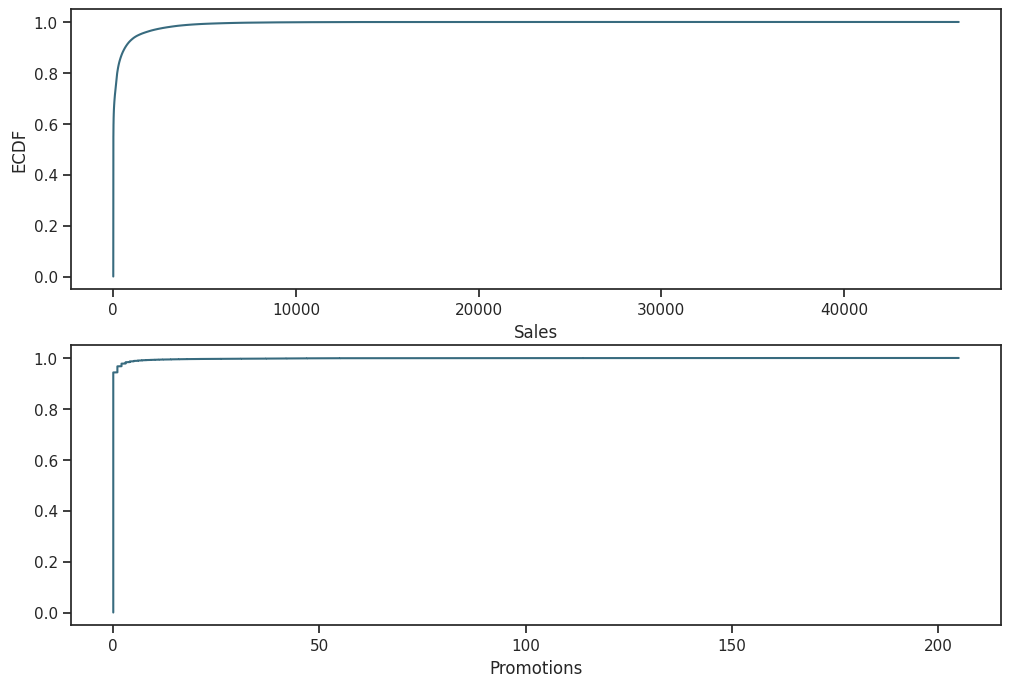

In [ ]:
sns.set(style = "ticks")# to format into seaborn
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 8))

plt.subplot(211)
cdf = ECDF(train['sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales')
plt.ylabel('ECDF')

# plot second ECDF
plt.subplot(212)
cdf = ECDF(train['onpromotion'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Promotions')

In [ ]:
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
store_data.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations
# that are present in both train and store sets are merged together
train_store = pd.merge(train, store_data, how = 'inner', on = 'store_nbr')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (1366720, 9)


,id,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13
1,1,1.0,BABY CARE,0.0,0.0,Quito,Pichincha,D,13
2,2,1.0,BEAUTY,0.0,0.0,Quito,Pichincha,D,13
3,3,1.0,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13
4,4,1.0,BOOKS,0.0,0.0,Quito,Pichincha,D,13


<Axes: xlabel='sales', ylabel='family'>

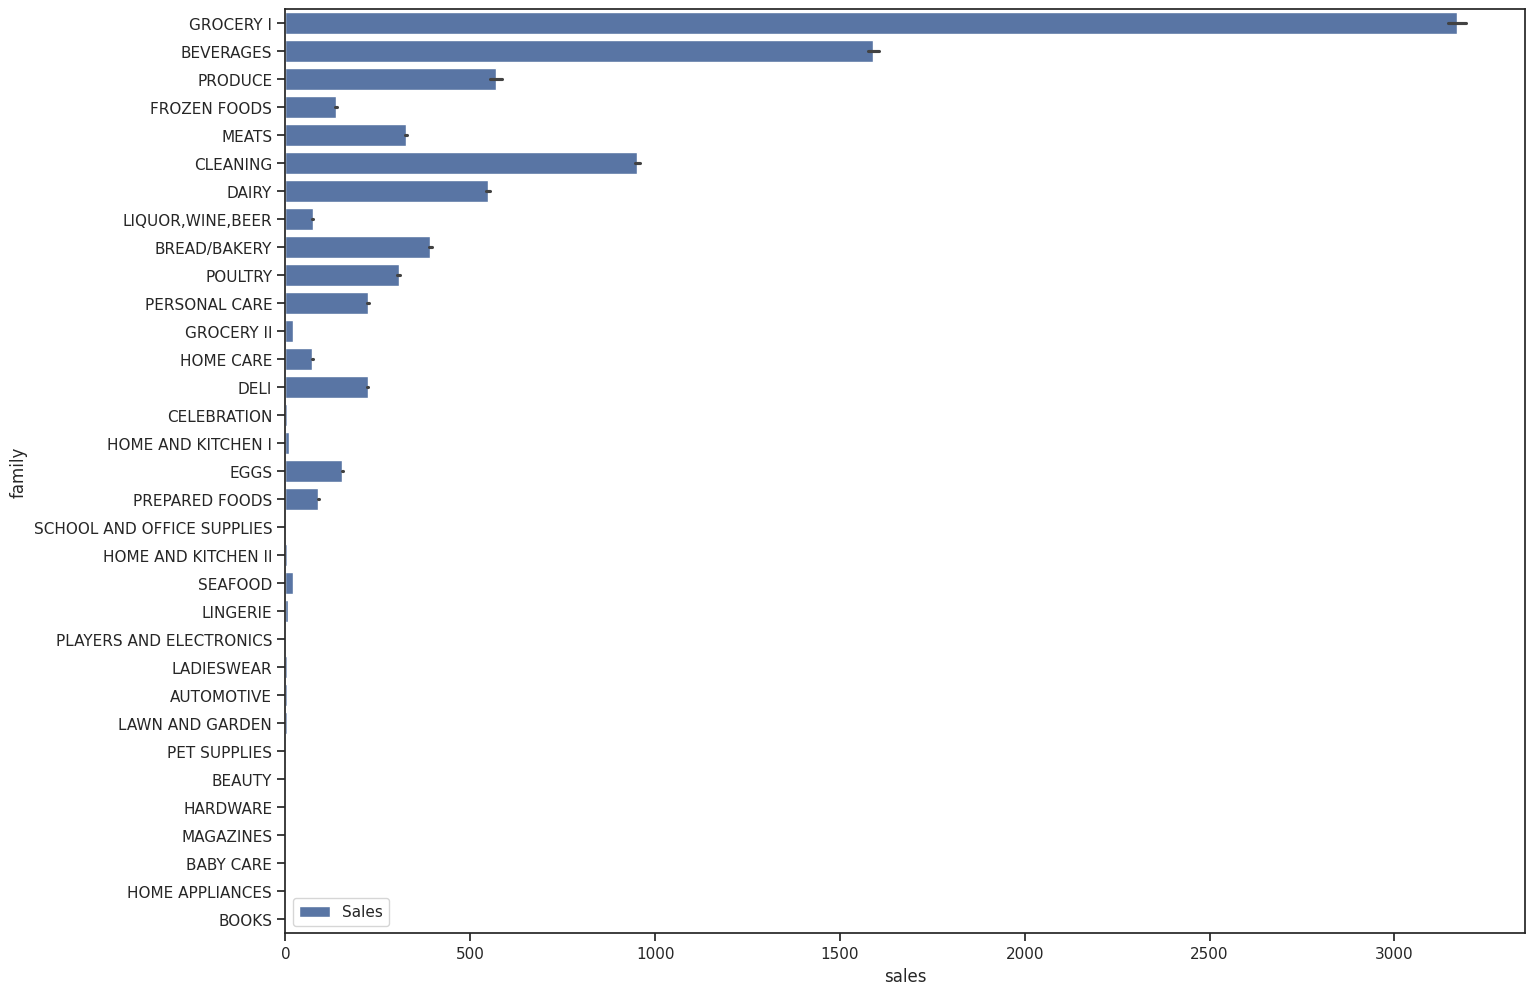

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(x="sales", y="family", data=train_store.sort_values(by=['sales','family'], ascending=False),
            label="Sales", color="b")

<Figure size 2400x1800 with 0 Axes>

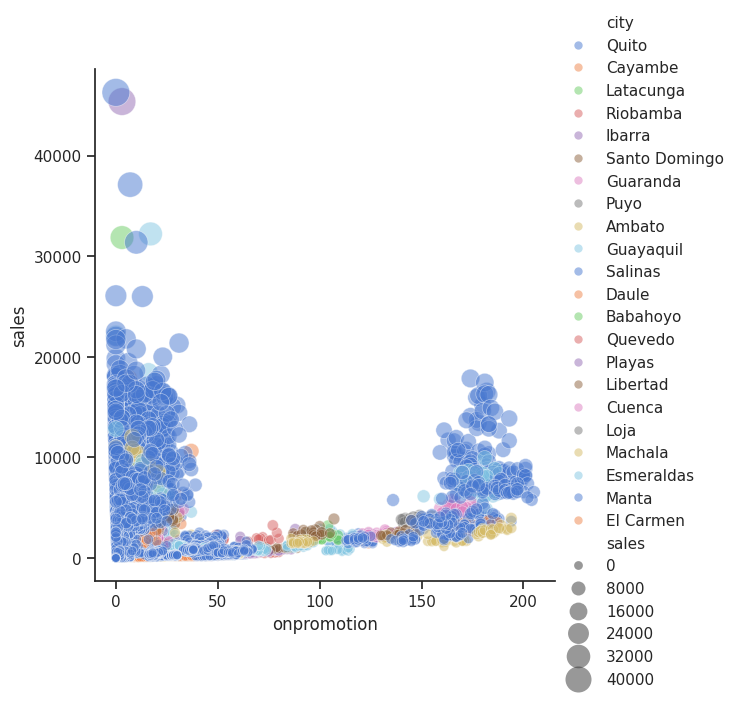

In [ ]:
plt.figure(figsize=(24,18))
sns.relplot(x="onpromotion", y="sales", hue="city", size="sales",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=train_store)

<Axes: title={'center': 'Counts of type of holiday'}, xlabel='locale', ylabel='count'>

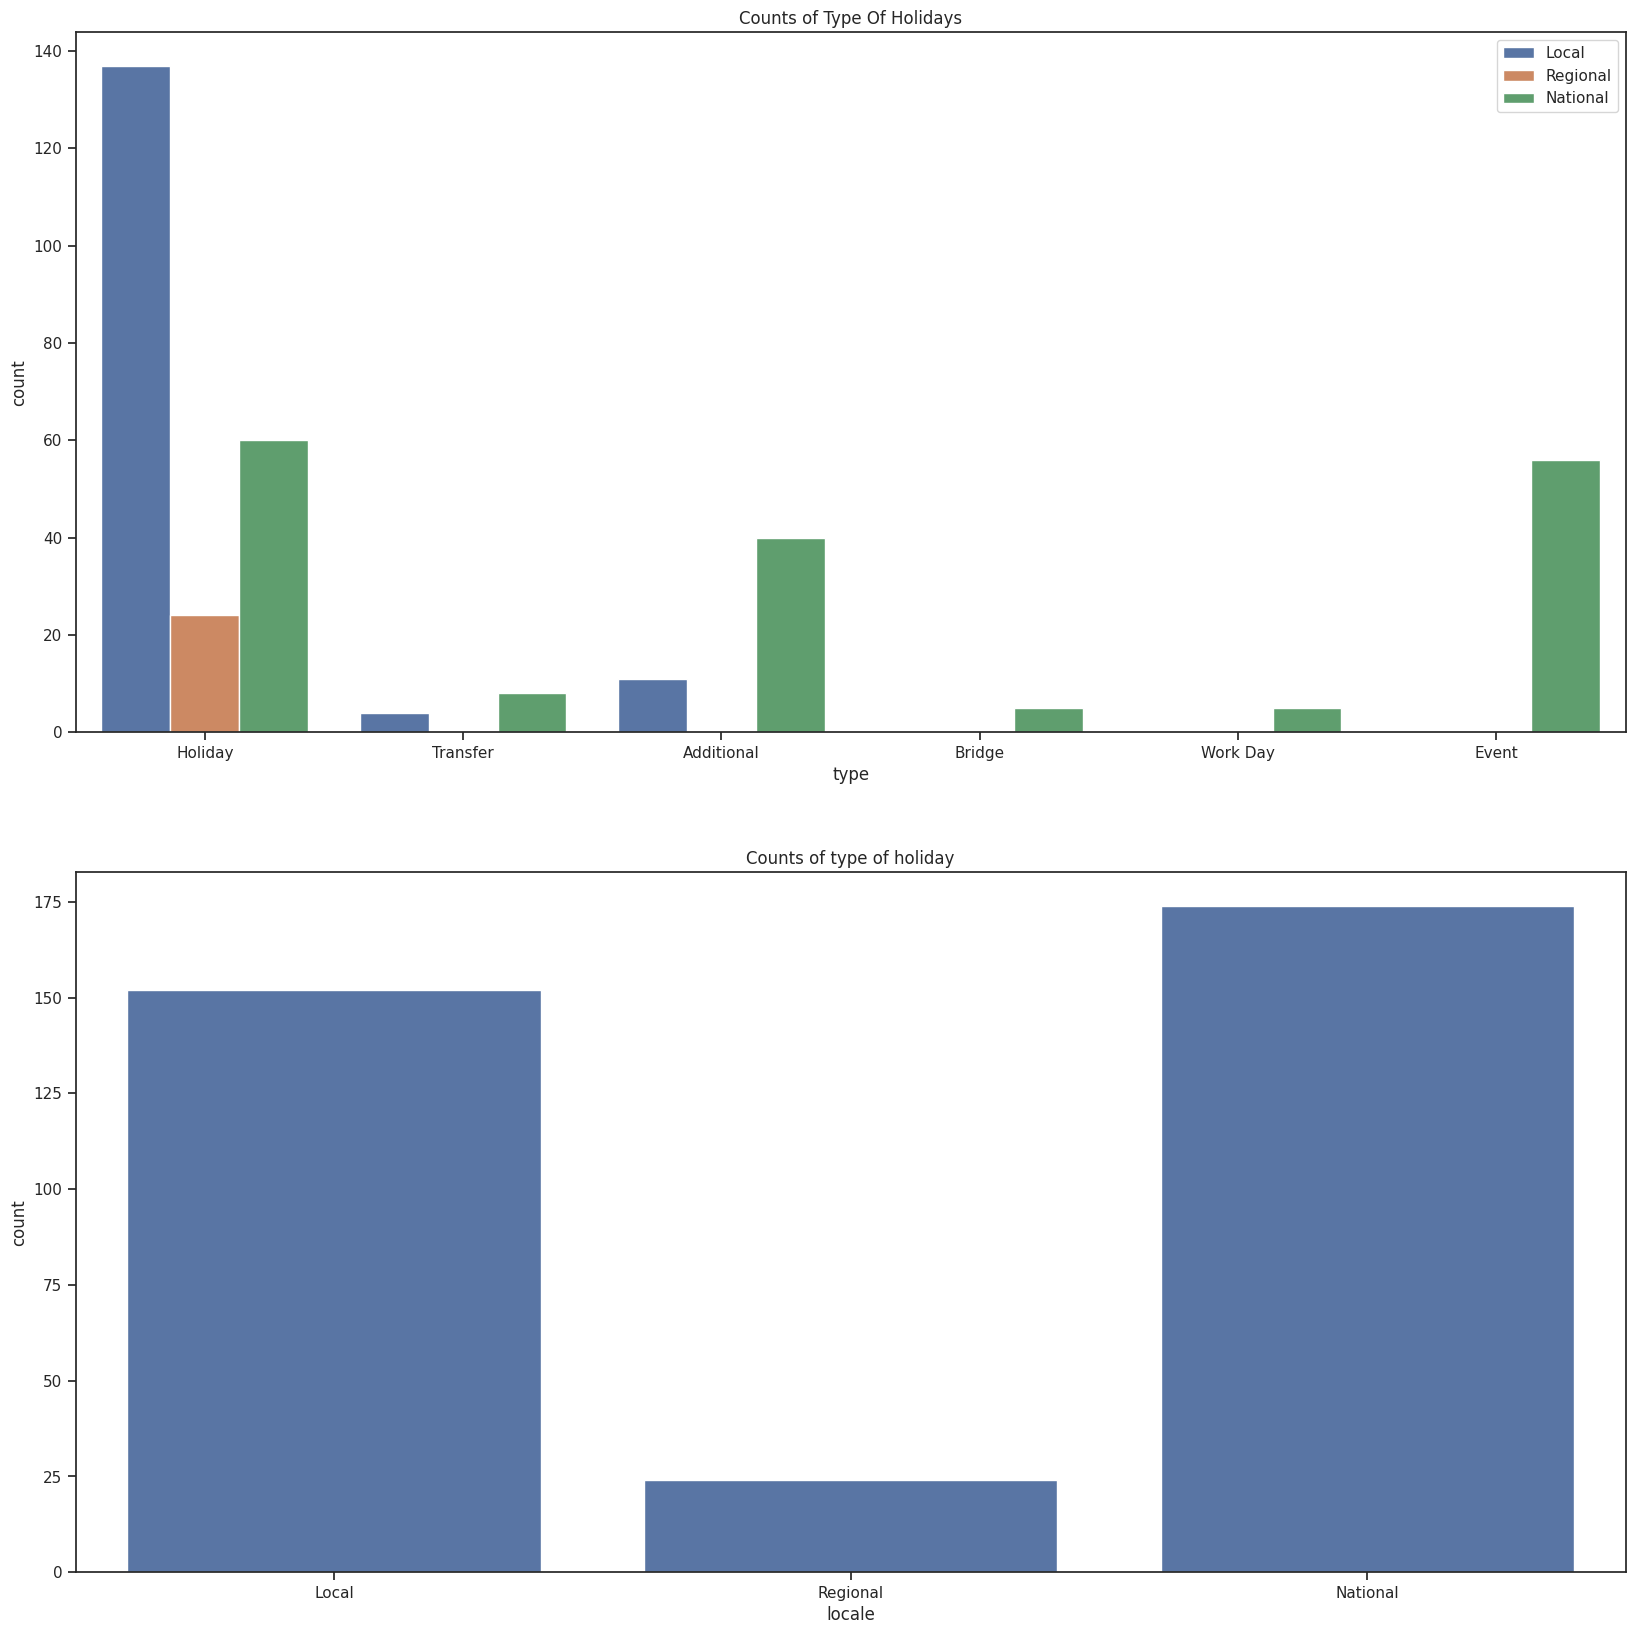

In [ ]:
plt.subplots(1,2,figsize=(20,20))
plt.subplot(211)
plt.title('Counts of Type Of Holidays')
sns.countplot(x=holidays_data.type, hue=holidays_data.locale)
plt.legend(loc='upper right')
plt.subplot(212)
plt.title('Counts of type of holiday')
sns.countplot(x=holidays_data.locale)

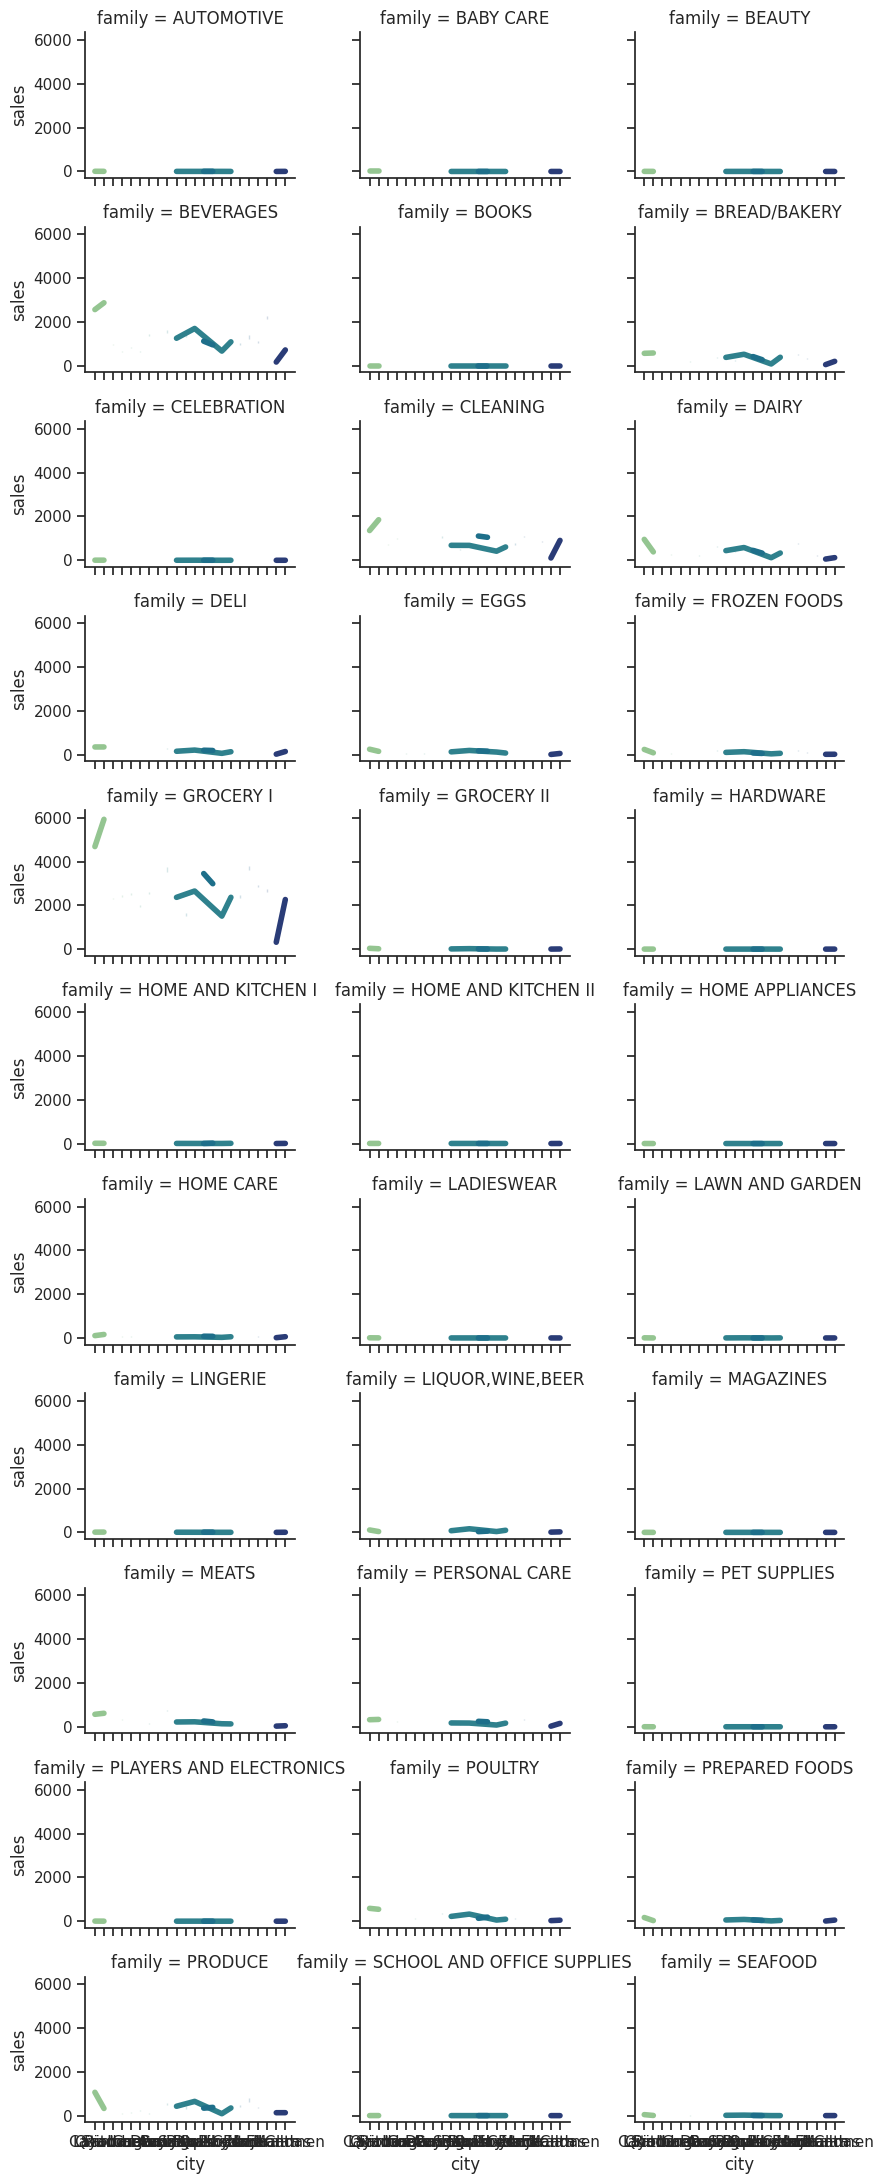

In [ ]:
g = sns.relplot(
    data=train_store,
    x="city", y="sales", col="family", hue="state",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

<Axes: xlabel='count', ylabel='city'>

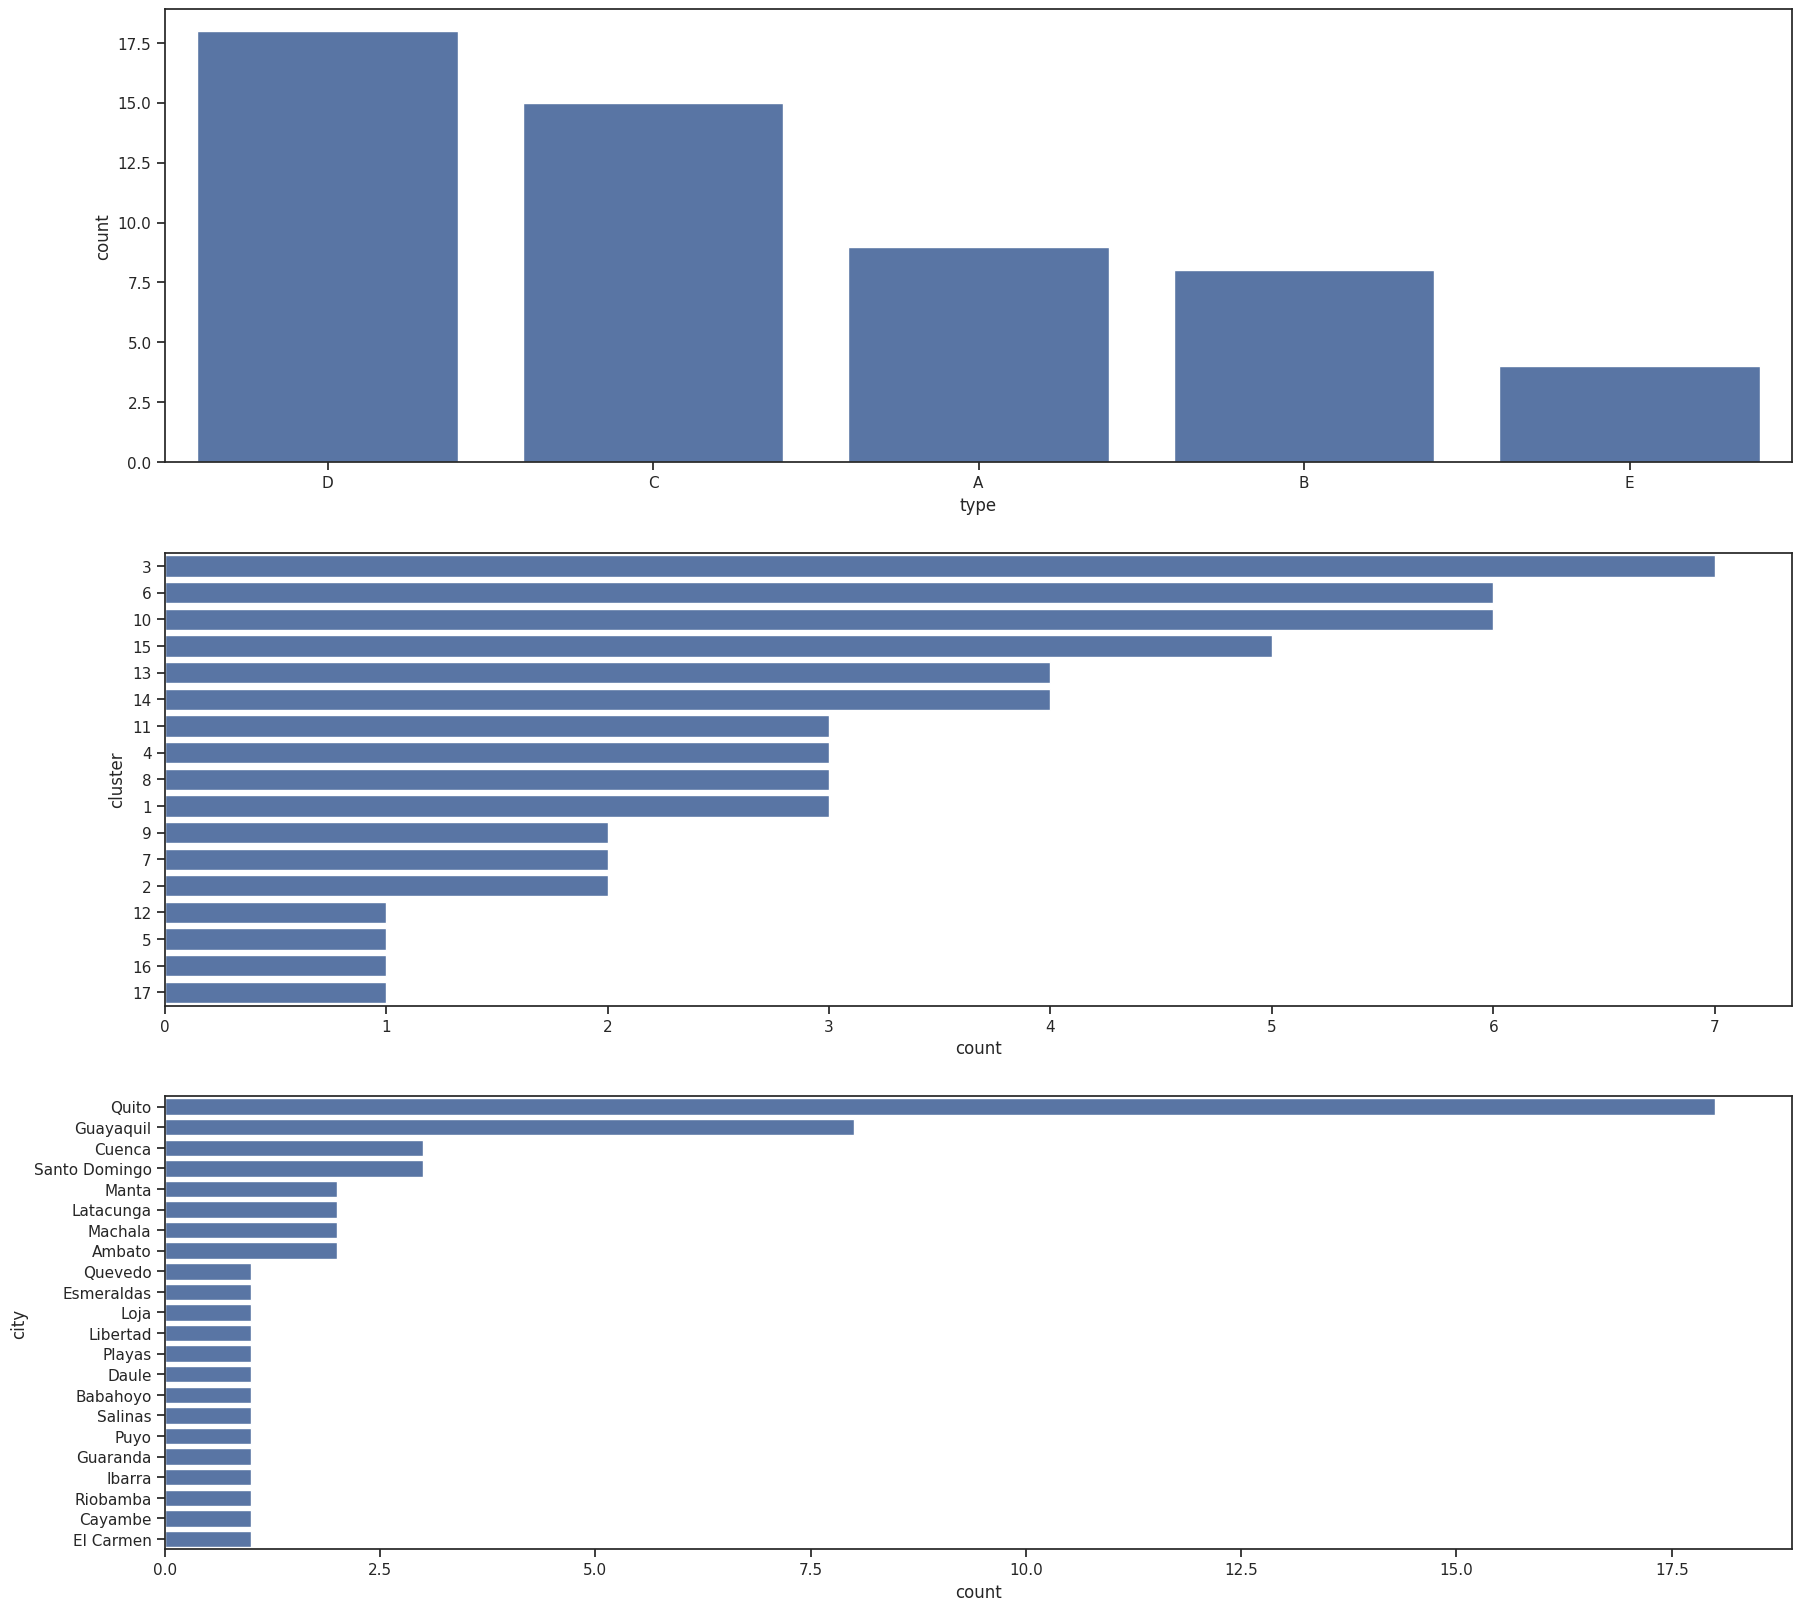

In [ ]:
plt.subplots(1,3,figsize=(21,20))
plt.subplot(311)
sns.countplot(x=store_data.type, order = store_data.type.value_counts().index)
plt.subplot(312)
sns.countplot(y=store_data.cluster, order = store_data.cluster.value_counts().index)
plt.subplot(313)
sns.countplot(y=store_data.city, order = store_data.city.value_counts().index)

In [ ]:
sns.factorplot(data = train_store, x ="Year", y = "sales",
               col = 'type', # per store type in cols
               hue = 'Month',
               row = "cluster")


AttributeError: module 'seaborn' has no attribute 'factorplot'

Columns in train_store DataFrame: Index(['Year', 'Month', 'sales', 'type', 'cluster'], dtype='object')


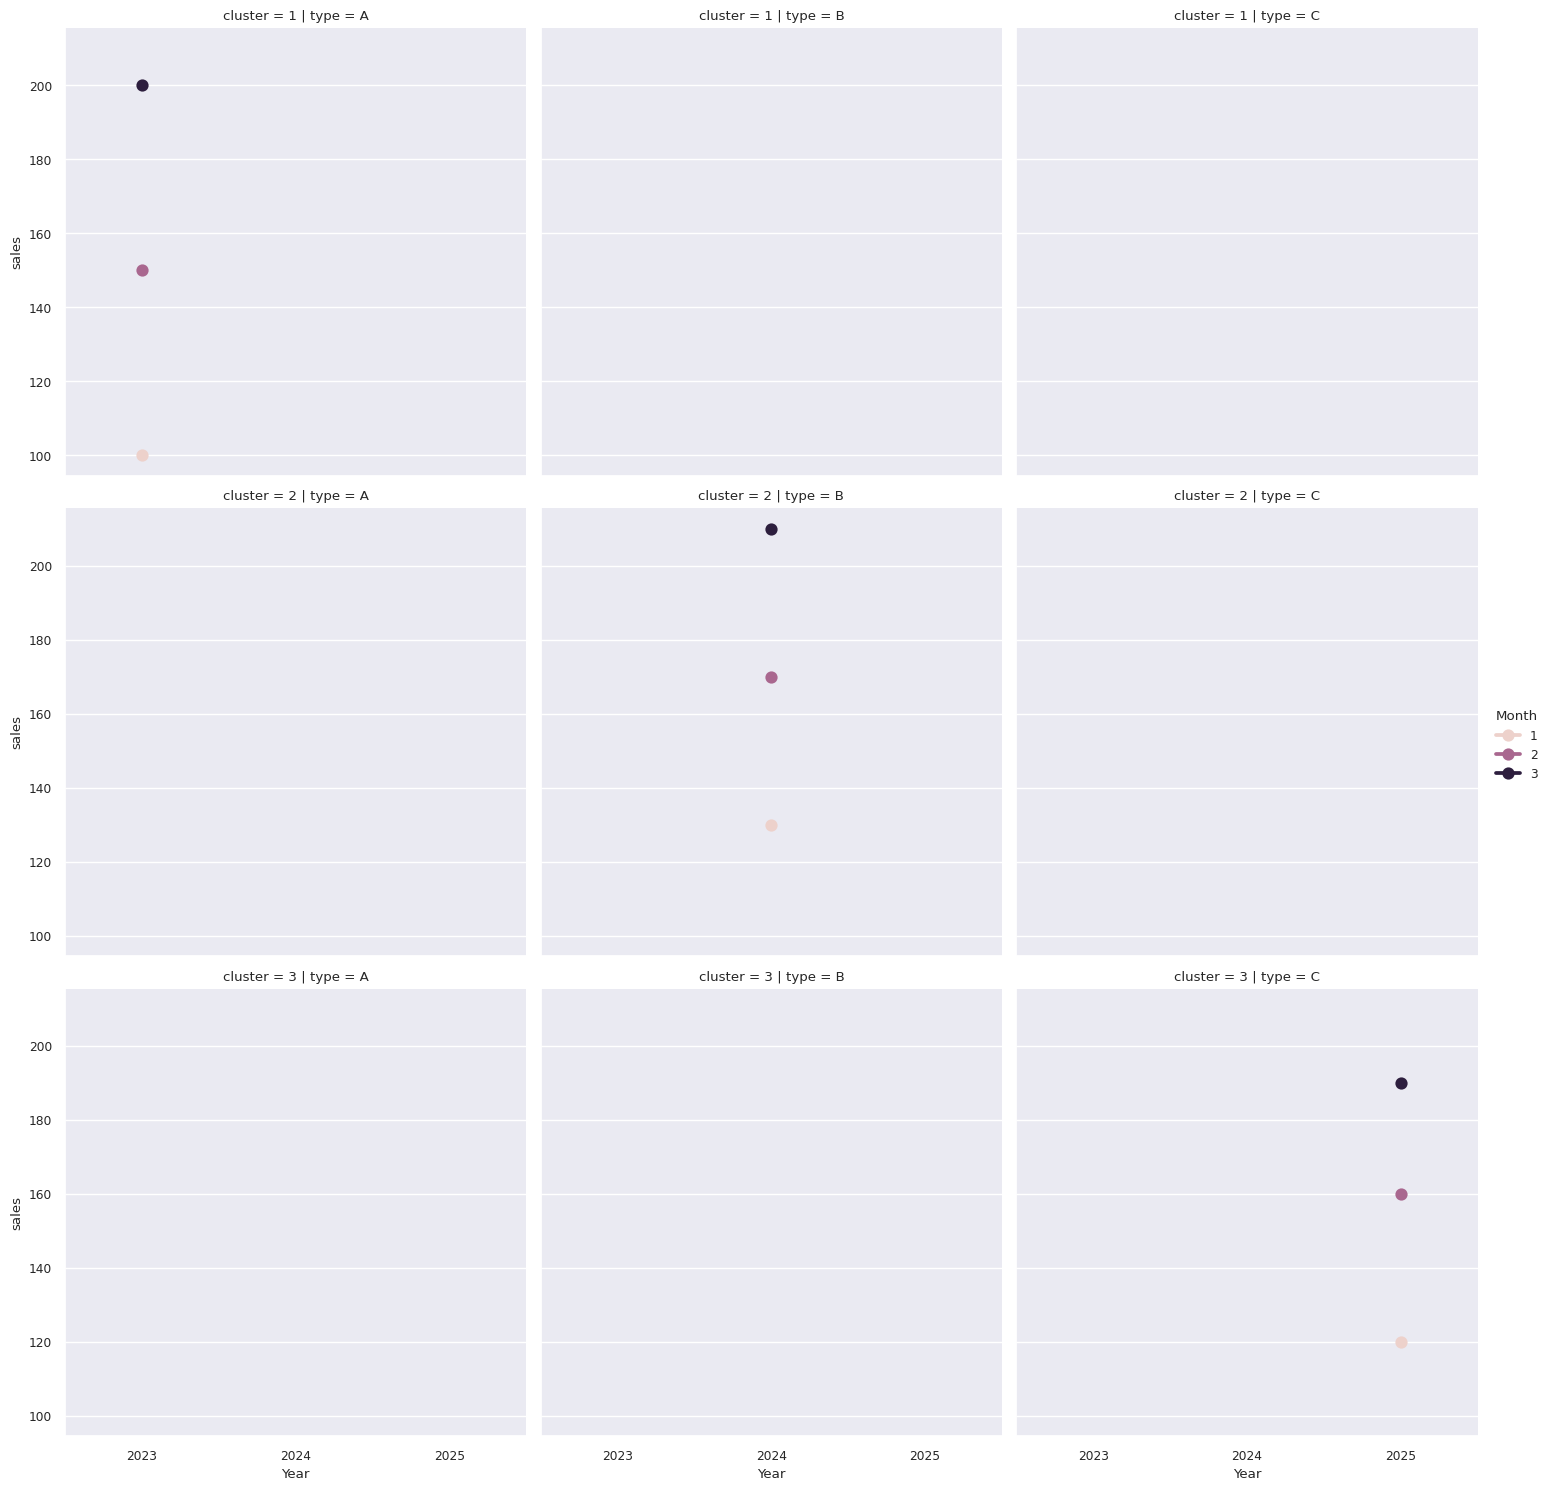

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create some example data
data = {
    'Year': [2023, 2023, 2023, 2024, 2024, 2024, 2025, 2025, 2025],
    'Month': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'sales': [100, 150, 200, 130, 170, 210, 120, 160, 190],
    'type': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'cluster': [1, 1, 1, 2, 2, 2, 3, 3, 3]
}

# Convert to DataFrame
train_store = pd.DataFrame(data)

# Verify column names
print("Columns in train_store DataFrame:", train_store.columns)

# Plot using seaborn catplot
sns.catplot(
    data=train_store,
    x="Year",
    y="sales",
    col='type',  # per store type in columns
    hue='Month',
    row="cluster",
    kind='point'  # Use 'point' kind to replicate factorplot behavior
)

# Show plot
plt.show()


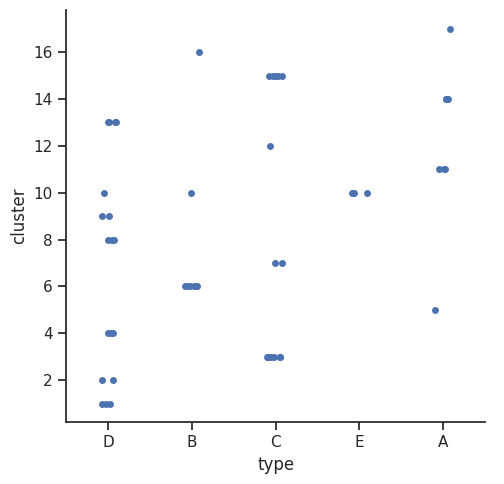

In [ ]:
sns.catplot(x = 'type', y='cluster',data=store_data, kind='strip')

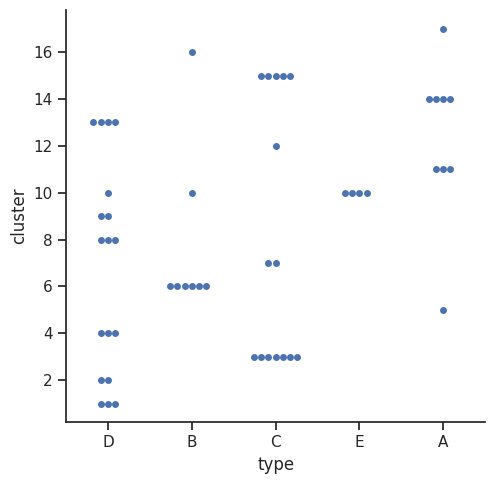

In [ ]:
sns.catplot(x = 'type', y='cluster',data=store_data, kind='swarm')

In [ ]:
# importing data
train = pd.read_csv('train.csv', parse_dates = True, low_memory = False, index_col = 'date')
test = pd.read_csv('test.csv')
submission_sample = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [ ]:
train=train.reset_index()
# sales for the store number 1 (StoreType C)
sales = train[train.store_nbr == 44].loc[:, ['date', 'sales']]

sales = sales.sort_index(ascending = False)

# to datetime64
sales['date'] = pd.DatetimeIndex(sales['date'])
sales.dtypes

# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'date': 'ds',
                                'sales': 'y'})
sales.head()

,ds,y
2640428,2017-01-25,82.575
2640427,2017-01-25,7.000
2640426,2017-01-25,14335.007
2640425,2017-01-25,445.813
2640424,2017-01-25,1054.900


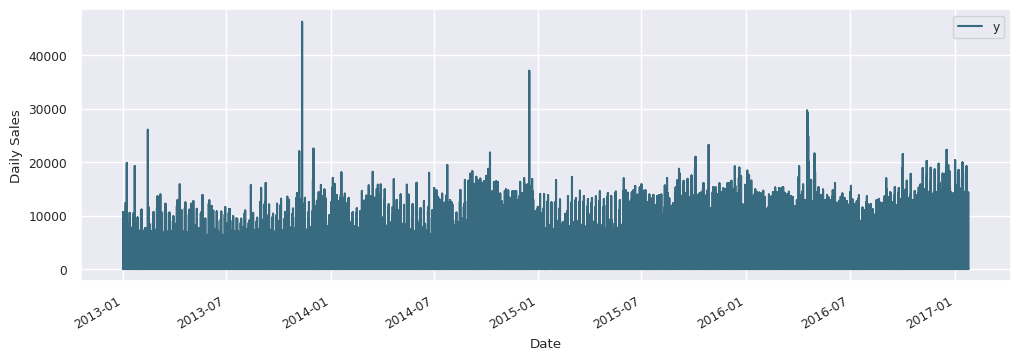

In [ ]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Sales')
ax.set_xlabel('Date')
plt.show()

In [ ]:
holidays_data.groupby(['type','locale']).head(100)
print(holidays_data.type.unique())
print(holidays_data.locale.unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
['Local' 'Regional' 'National']


In [ ]:
# create holidays dataframe
state_dates = holidays_data[((holidays_data.locale == 'National') |
                             (holidays_data.locale == 'Regional') &
                             (holidays_data.type == 'Holiday'))].loc[:, 'date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
holidays = state
holidays.head()

,holiday,ds
0,state_holiday,2012-04-01
1,state_holiday,2012-06-25
2,state_holiday,2012-08-10
3,state_holiday,2012-10-09
4,state_holiday,2012-10-12


In [ ]:
from fastai.tabular.all import *
from sklearn.metrics import mean_squared_log_error

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train))

In [ ]:
tab_pd = TabularPandas(train,
                       procs = [Categorify, FillMissing, Normalize],
                       cat_names=['store_nbr', 'family'],
                       cont_names =['onpromotion'],
                       y_names = 'sales',
                       splits = splits)


In [ ]:
dls = tab_pd.dataloaders(bs=1024)

In [ ]:
dls.show_batch()

,store_nbr,family,onpromotion,sales
0,13,AUTOMOTIVE,-2.401710e-08,6.000000
1,25,GROCERY II,-2.401710e-08,17.000000
2,48,LADIESWEAR,-2.401710e-08,28.000000
3,1,BREAD/BAKERY,-2.401710e-08,406.622986
4,54,BOOKS,-2.401710e-08,0.000000
5,11,CELEBRATION,-2.401710e-08,0.000000
6,13,DELI,-2.401710e-08,71.000000
7,34,EGGS,-2.401710e-08,108.000000
8,21,HOME AND KITCHEN II,-2.401710e-08,0.000000
9,42,MAGAZINES,-2.401710e-08,0.000000


In [ ]:
train.sales.max()

124717.0

In [ ]:
def rmsle(inp, targ):
    inp = inp.detach().cpu().numpy()
    targ = targ.detach().cpu().numpy()
    return np.sqrt(mean_squared_log_error(targ, inp))

In [ ]:
learner = tabular_learner(dls, metrics=rmsle, y_range=(0, 125000))

In [ ]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,rmsle,time
0,388391.218750,333559.437500,3.295703,00:42


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
dl = learner.dls.test_dl(test)

In [ ]:
preds = learner.get_preds(dl=dl)
preds[0].shape

torch.Size([28512, 1])

In [ ]:
submission_sample = pd.read_csv('sample_submission.csv')

In [ ]:
submission_sample.sales = preds[0].detach().cpu().numpy()
submission_sample.head(3)

,id,sales
0,3000888,113.265450
1,3000889,134.591568
2,3000890,238.679947


In [ ]:
submission_sample.to_csv('submission.csv', index=False)